# Análise exploratória da Fórmula 1 
### O objetivo desse projeto é tratar as informações e analisar os dados disponíveis, além de fornecer os resultados compilados em csv para ser utilizado em um dashboard interativo. 


Link kaggle: https://www.kaggle.com/datasets/muhammadehsan02/formula-1-world-championship-history-1950-2024?resource=download

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
cores = plt.get_cmap('tab20').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle = ciclo_cores)

## Exploração dos dados
- Começamos carregando os dados e compilando em uma lista, assim ficando mais fácil de ir separando e categorizandos as informações presentes nos datasets. 

In [2]:
caminho = glob.os.getcwd()
arquivos = glob.glob(f'{caminho}/bases/*.csv')

lista_df = []

for x in arquivos:
    #adicionando esse tratamento para ignorar os dados que serão exportados nesse notebook e utilizados no dashboard
    if 'f1_dados_tratados.csv' in x: 
        continue
    print(x)
    arquivo = pd.read_csv(x)
    lista_df.append(arquivo)

c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Constructor_Performance.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Constructor_Rankings.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Driver_Details.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Driver_Rankings.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Lap_Timings.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Pit_Stop_Records.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Qualifying_Results.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Race_Results.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Race_Schedule.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Race_Status.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Season_Summaries.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Sprint_Race_Results.csv
c:\Users\Samuel\Desktop\Portfólio Python\Formula1/bases\Team_Details.csv
c:\User

In [3]:
#Verificando os dataframes
for df in lista_df:
    df.info()
    print('--'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12505 entries, 0 to 12504
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12505 non-null  int64  
 1   raceId                12505 non-null  int64  
 2   constructorId         12505 non-null  int64  
 3   points                12505 non-null  float64
 4   status                12505 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 488.6+ KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13271 entries, 0 to 13270
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13271 non-null  int64  
 1   raceId                  13271 non-null  int64  
 2   constructorId           13271 non-null  int64

In [4]:
#Separando em variáveis para facilitar a identificação dos datasets (conferindo também via Excel)
performance_construtores = lista_df[0]
ranking_construtores = lista_df[1]
detalhes_pilotos = lista_df[2]
classificacao_pilotos = lista_df[3]
tempo_volta = lista_df[4]
pitstop = lista_df[5]
qualificatorio = lista_df[6]
resultados_corridas = lista_df[7]
programacao_corridas = lista_df[8]
status_corridas = lista_df[9]
sumario_temporada = lista_df[10]
sprint = lista_df[11]
equipes = lista_df[12]
pistas = lista_df[13]

 - Compilando os dados importantes para as análises em uma só base para facilitar as análises, e à medida que formos avançando adicionamos mais informações ao dataframe principal.

In [5]:
# Adicionando os dados de circuito
programacao_corridas = pd.merge(programacao_corridas, pistas[['circuitId','lat','lng','alt']],
                               on='circuitId', how='left')
programacao_corridas.rename(columns={'name' : 'circuit_name'}, inplace=True)
resultados_corridas = pd.merge(resultados_corridas, programacao_corridas[['raceId','year', 'circuit_name', 'lat','lng', 'alt']],
                               on='raceId', how='left')


# Adicionando dados dos pilotos
detalhes_pilotos['driver_name'] = detalhes_pilotos['forename'] + ' ' + detalhes_pilotos['surname']
resultados_corridas = pd.merge(resultados_corridas, detalhes_pilotos[['driverId','driver_name']], on='driverId', how='left')

# Adicionando dados dos construtores
equipes.rename(columns={'name' : 'team_name'}, inplace=True)
resultados_corridas = pd.merge(resultados_corridas, equipes[['constructorId','team_name']], on='constructorId', how='left')

#Adicionando o status das corridas
resultados_corridas = pd.merge(resultados_corridas, status_corridas[['statusId','status']], on='statusId', how='left')


resultados_corridas.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,year,circuit_name,lat,lng,alt,driver_name,team_name,status
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,2008,Australian Grand Prix,-37.8497,144.968,10,Lewis Hamilton,McLaren,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,1,2008,Australian Grand Prix,-37.8497,144.968,10,Nick Heidfeld,BMW Sauber,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,1,2008,Australian Grand Prix,-37.8497,144.968,10,Nico Rosberg,Williams,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,1,2008,Australian Grand Prix,-37.8497,144.968,10,Fernando Alonso,Renault,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,1,2008,Australian Grand Prix,-37.8497,144.968,10,Heikki Kovalainen,McLaren,Finished


In [6]:
resultados_corridas.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'circuit_name', 'lat', 'lng',
       'alt', 'driver_name', 'team_name', 'status'],
      dtype='object')

In [7]:
# Excluindo colunas que não serão útesi para as análises. Ex. Número do piloto, IDs (já que atualizamos para os nomes)
resultados_corridas.drop(columns=['fastestLap',
                                  'resultId',
                                  'number', 
                                  'milliseconds', 
                                  'driverId', 
                                  'raceId', 
                                  'constructorId', 
                                  'statusId'],
                         inplace=True)


In [8]:
# Adicionando coluna de performance da corrida (Resultado da corrida - Posição do Grid)

resultados_corridas['diffPos'] = resultados_corridas['grid'] - resultados_corridas['positionOrder']


- Verificando as informações de cada coluna para executar os tratamentos necessários

In [9]:
resultados_corridas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26519 entries, 0 to 26518
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grid             26519 non-null  int64  
 1   position         26519 non-null  object 
 2   positionText     26519 non-null  object 
 3   positionOrder    26519 non-null  int64  
 4   points           26519 non-null  float64
 5   laps             26519 non-null  int64  
 6   time             26519 non-null  object 
 7   rank             26519 non-null  object 
 8   fastestLapTime   26519 non-null  object 
 9   fastestLapSpeed  26519 non-null  object 
 10  year             26519 non-null  int64  
 11  circuit_name     26519 non-null  object 
 12  lat              26519 non-null  float64
 13  lng              26519 non-null  float64
 14  alt              26519 non-null  int64  
 15  driver_name      26519 non-null  object 
 16  team_name        26519 non-null  object 
 17  status      

In [10]:
resultados_corridas.describe()

,grid,positionOrder,points,laps,year,lat,lng,alt,diffPos
count,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000
mean,11.145820,12.814812,1.959578,46.228251,1991.099287,33.993151,5.821313,275.827897,-1.668992
std,7.213453,7.677869,4.306475,29.577860,19.799290,25.274268,57.531626,406.686418,9.643480
min,0.000000,1.000000,0.000000,0.000000,1950.000000,-37.849700,-118.189000,-7.000000,-39.000000
25%,5.000000,6.000000,0.000000,23.000000,1977.000000,34.843100,-1.016940,18.000000,-5.000000
50%,11.000000,12.000000,0.000000,53.000000,1991.000000,43.734700,6.947500,153.000000,0.000000
75%,17.000000,18.000000,2.000000,66.000000,2008.000000,49.254200,14.764700,401.000000,4.000000
max,34.000000,39.000000,50.000000,200.000000,2024.000000,57.265300,144.968000,2227.000000,30.000000


In [11]:
resultados_corridas['positionOrder'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39], dtype=int64)

In [12]:
resultados_corridas.describe(exclude=[np.number])

,position,positionText,time,rank,fastestLapTime,fastestLapSpeed,circuit_name,driver_name,team_name,status
count,26519,26519,26519,26519,26519,26519,26519,26519,26519,26519
unique,34,39,7272,26,7298,7514,54,859,211,137
top,\N,R,\N,\N,\N,\N,British Grand Prix,Fernando Alonso,Ferrari,Finished
freq,10928,8876,18986,18249,18499,18499,1873,392,2415,7528


In [13]:
resultados_corridas['position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '\\N', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33'],
      dtype=object)

In [14]:
resultados_corridas.loc[resultados_corridas['position'] == '\\N', :]

,grid,position,positionText,positionOrder,points,laps,time,rank,fastestLapTime,fastestLapSpeed,year,circuit_name,lat,lng,alt,driver_name,team_name,status,diffPos
8,2,\N,R,9,0.0,47,\N,9,1:28.753,215.100,2008,Australian Grand Prix,-37.8497,144.96800,10,Robert Kubica,BMW Sauber,Collision,-7
9,18,\N,R,10,0.0,43,\N,13,1:29.558,213.166,2008,Australian Grand Prix,-37.8497,144.96800,10,Timo Glock,Toyota,Accident,8
10,19,\N,R,11,0.0,32,\N,15,1:30.892,210.038,2008,Australian Grand Prix,-37.8497,144.96800,10,Takuma Sato,Super Aguri,Transmission,8
11,20,\N,R,12,0.0,30,\N,16,1:31.384,208.907,2008,Australian Grand Prix,-37.8497,144.96800,10,Nelson Piquet Jr.,Renault,Clutch,8
12,4,\N,R,13,0.0,29,\N,6,1:28.175,216.510,2008,Australian Grand Prix,-37.8497,144.96800,10,Felipe Massa,Ferrari,Engine,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26456,16,\N,R,18,0.0,51,\N,16,1:18.819,199.185,2024,Canadian Grand Prix,45.5000,-73.52280,13,Sergio Pérez,Red Bull,Accident,-2
26457,11,\N,R,19,0.0,40,\N,19,1:26.012,182.528,2024,Canadian Grand Prix,45.5000,-73.52280,13,Charles Leclerc,Ferrari,Engine,-8
26458,13,\N,R,20,0.0,23,\N,20,1:26.484,181.531,2024,Canadian Grand Prix,45.5000,-73.52280,13,Logan Sargeant,Williams,Accident,-7
26517,1,\N,R,19,0.0,33,\N,19,1:31.298,232.289,2024,British Grand Prix,52.0786,-1.01694,153,George Russell,Mercedes,Water pressure,-18


In [15]:
#Verificando se nessa base todos os pilotos possuem posições preenchidas
resultados_corridas.loc[resultados_corridas['rank'] == '\\N', :].positionOrder.unique()

array([17, 18, 19, 20, 21, 22, 16,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1,
        2,  3,  4,  5,  6, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39], dtype=int64)

- Como podemos ver, existem posições maiores que 20°, o que ultrapassa o número de pilotos atual no grid. Vamos verificar se esses dados estão corretos ou incoerentes.

In [16]:
validacao_posicoes = resultados_corridas.loc[resultados_corridas['positionOrder'] > 24, ['positionOrder','year', 'driver_name','circuit_name']]
validacao_posicoes

,positionOrder,year,driver_name,circuit_name
4744,25,1995,Olivier Panis,Brazilian Grand Prix
4745,26,1995,Pierluigi Martini,Brazilian Grand Prix
4770,25,1995,Karl Wendlinger,Argentine Grand Prix
4771,26,1995,Luca Badoer,Argentine Grand Prix
4796,25,1995,Taki Inoue,San Marino Grand Prix
...,...,...,...,...
20179,27,1950,Bill Cantrell,Indianapolis 500
20233,25,1954,Bob Scott,Indianapolis 500
20234,28,1954,Pat Flaherty,Indianapolis 500
20235,30,1954,Danny Kladis,Indianapolis 500


In [17]:
validacao_posicoes.groupby('year').count()

,positionOrder,driver_name,circuit_name
year,,,
1950,13,13,13
1951,9,9,9
1952,34,34,34
1953,29,29,29
1954,21,21,21
1955,10,10,10
1956,14,14,14
1957,9,9,9
1958,19,19,19


Como temos um número grande de pilotos e prêmios em determinados anos, esses dados me parecem coerentes. Em uma rápida pesquisa pode verificar que existem algumas corridas que haviam mais de 20 pilotos no grid. Caso sintam curiosidade pode ser verificado no site do F1 stats. 

link: https://www.statsf1.com/pt/1950/pilotes.aspx

 - Vamos agora adicionar uma coluna de vitórias para cada piloto e retirar algumas estatísticas de cada competidor.

In [18]:
#Atribui valores de 0 e 1, sendo 1 -> Vitória e 0 -> Derrota, para facilitar os cálculos
resultados_corridas['wins'] = resultados_corridas['positionOrder'].apply(lambda x: 1 if x == 1 else 0)
resultados_corridas.loc[resultados_corridas['wins'] == 1, ['wins', 'positionOrder']].value_counts()

wins  positionOrder
1     1                1116
Name: count, dtype: int64

In [19]:
resultados_corridas.columns

Index(['grid', 'position', 'positionText', 'positionOrder', 'points', 'laps',
       'time', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'year',
       'circuit_name', 'lat', 'lng', 'alt', 'driver_name', 'team_name',
       'status', 'diffPos', 'wins'],
      dtype='object')

In [20]:
#Agregando os resultados de acorod com o ano, piloto, circuito, equipe e status da corrida.

stats_corridas = resultados_corridas.groupby(['year','driver_name', 'circuit_name', 'team_name', 'status', 'lat', 'lng', 'alt']).agg(
    {
        'grid' : 'mean',
        'positionOrder': 'mean',
        'points': 'sum',
        'laps' : 'sum', 
        'time' : 'sum',
        'rank': 'min',
        'fastestLapTime': 'min',
        'fastestLapSpeed' : 'max',
        'diffPos': 'mean',
        'wins' : 'sum',
    }
).reset_index()

stats_corridas

,year,driver_name,circuit_name,team_name,status,lat,lng,alt,grid,positionOrder,points,laps,time,rank,fastestLapTime,fastestLapSpeed,diffPos,wins
0,1950,Alberto Ascari,Belgian Grand Prix,Ferrari,+1 Lap,50.4372,5.97139,401,7.0,5.0,2.0,34,\N,\N,\N,\N,2.0,0
1,1950,Alberto Ascari,Italian Grand Prix,Ferrari,Engine,45.6156,9.28111,162,2.0,17.0,0.0,21,\N,\N,\N,\N,-15.0,0
2,1950,Alberto Ascari,Italian Grand Prix,Ferrari,Finished,45.6156,9.28111,162,6.0,2.0,3.0,80,\N,\N,\N,\N,4.0,0
3,1950,Alberto Ascari,Monaco Grand Prix,Ferrari,+1 Lap,43.7347,7.42056,7,7.0,2.0,6.0,99,\N,\N,\N,\N,5.0,0
4,1950,Alberto Ascari,Swiss Grand Prix,Ferrari,Oil pump,46.9589,7.40194,551,5.0,17.0,0.0,4,\N,\N,\N,\N,-12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26511,2024,Yuki Tsunoda,Japanese Grand Prix,RB F1 Team,+1 Lap,34.8431,136.54100,45,10.0,10.0,1.0,52,\N,14,1:36.342,216.989,0.0,0
26512,2024,Yuki Tsunoda,Miami Grand Prix,RB F1 Team,Finished,25.9581,-80.23890,0,10.0,7.0,6.0,57,+26.185,10,1:31.682,212.508,3.0,0
26513,2024,Yuki Tsunoda,Monaco Grand Prix,RB F1 Team,+1 Lap,43.7347,7.42056,7,8.0,8.0,4.0,77,\N,0,\N,\N,0.0,0
26514,2024,Yuki Tsunoda,Saudi Arabian Grand Prix,RB F1 Team,+1 Lap,21.6319,39.10440,15,9.0,15.0,0.0,49,\N,15,1:33.026,238.926,-6.0,0


- Como essa base é bem extensa, irei focar nos anos mais recentes da competição em que houve poucas mudanças de regulamento e pontuação de corrida. Não tivemos mudança nos pontos distribuídos na corrida desde 2019, por exemplo.

Caso queira se interar mais, segue o link sobre as pontuações desde 1950: https://pt.wikipedia.org/wiki/Sistema_de_pontua%C3%A7%C3%A3o_da_F%C3%B3rmula_1 

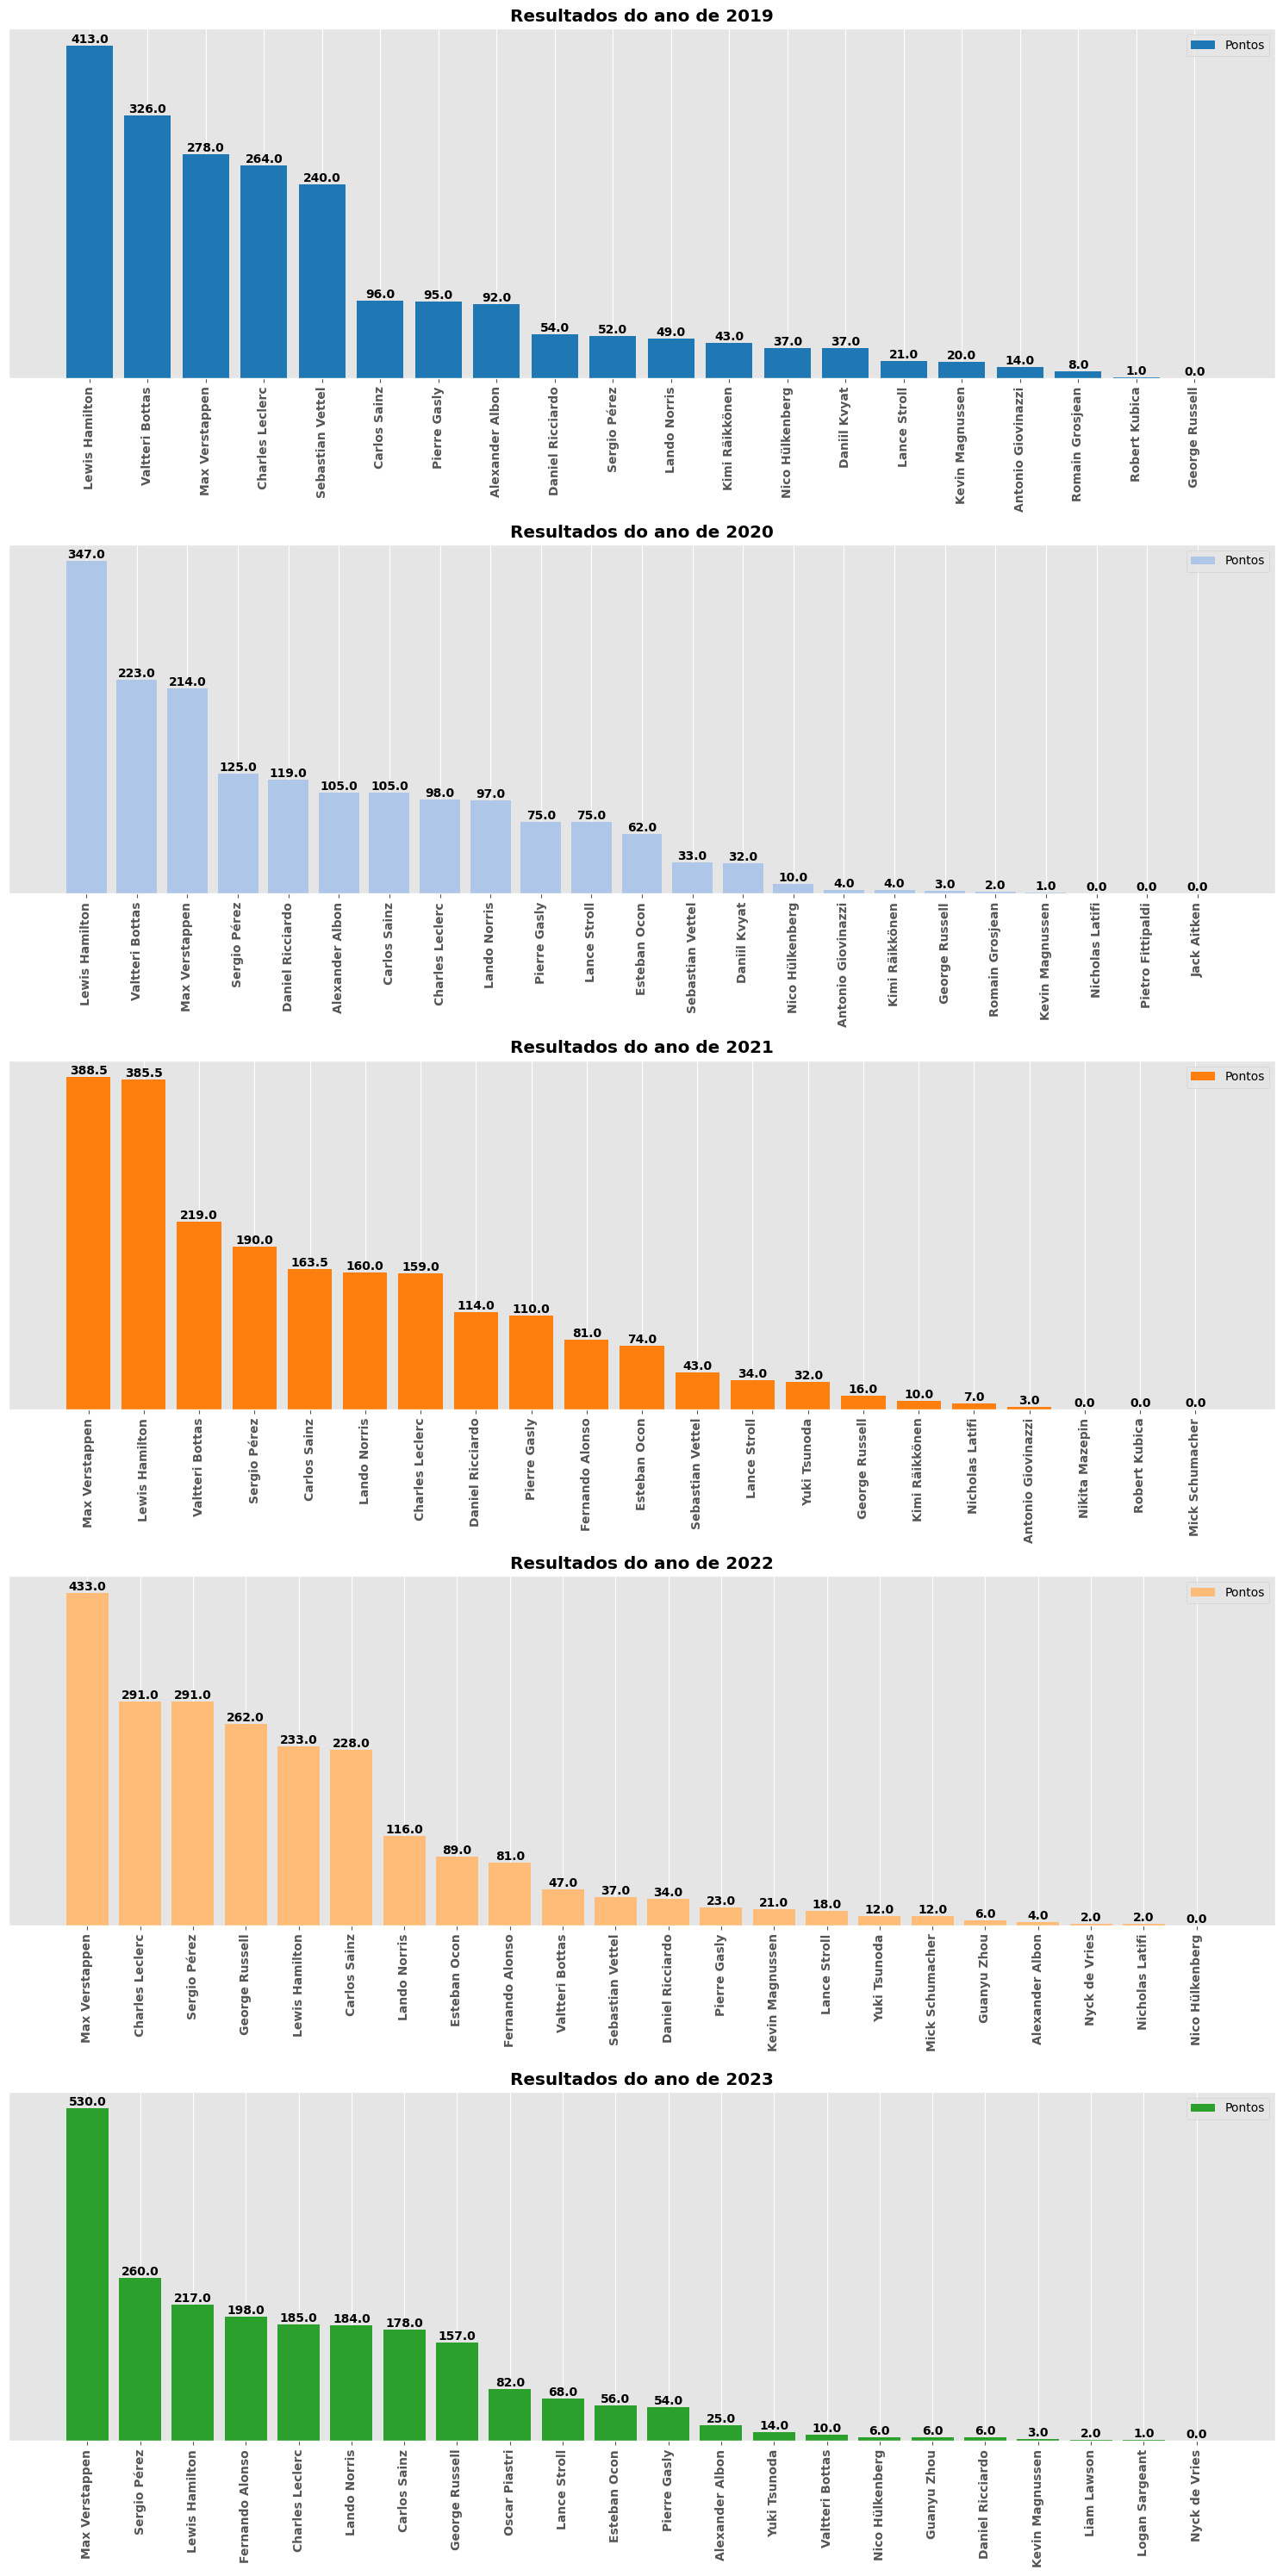

In [21]:
#Análise de performance dos pilotos nos últimos 5 anos. 
anos = [2019, 2020, 2021, 2022, 2023] #OBS.: Como não temos dados completos de 2024, considerei a partir de 2023 
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 30)) 

for i, ano in enumerate(anos):
    
    df_plot = stats_corridas[['driver_name', 'points', 'wins']].loc[stats_corridas['year'] == ano].groupby('driver_name').sum().sort_values(by='points', ascending=False)

    g_barra = axs[i].bar(df_plot.index, df_plot['points'], color=cores[i], label='Pontos')

    axs[i].bar_label(g_barra, labels=df_plot['points'], fontweight='bold')
    axs[i].set_yticks([]) 
    axs[i].set_xticklabels(df_plot.index, rotation=90, fontweight='bold') 
    axs[i].legend()
    axs[i].set_title(f'Resultados do ano de {ano}', fontweight='bold')

plt.tight_layout() 
plt.show()

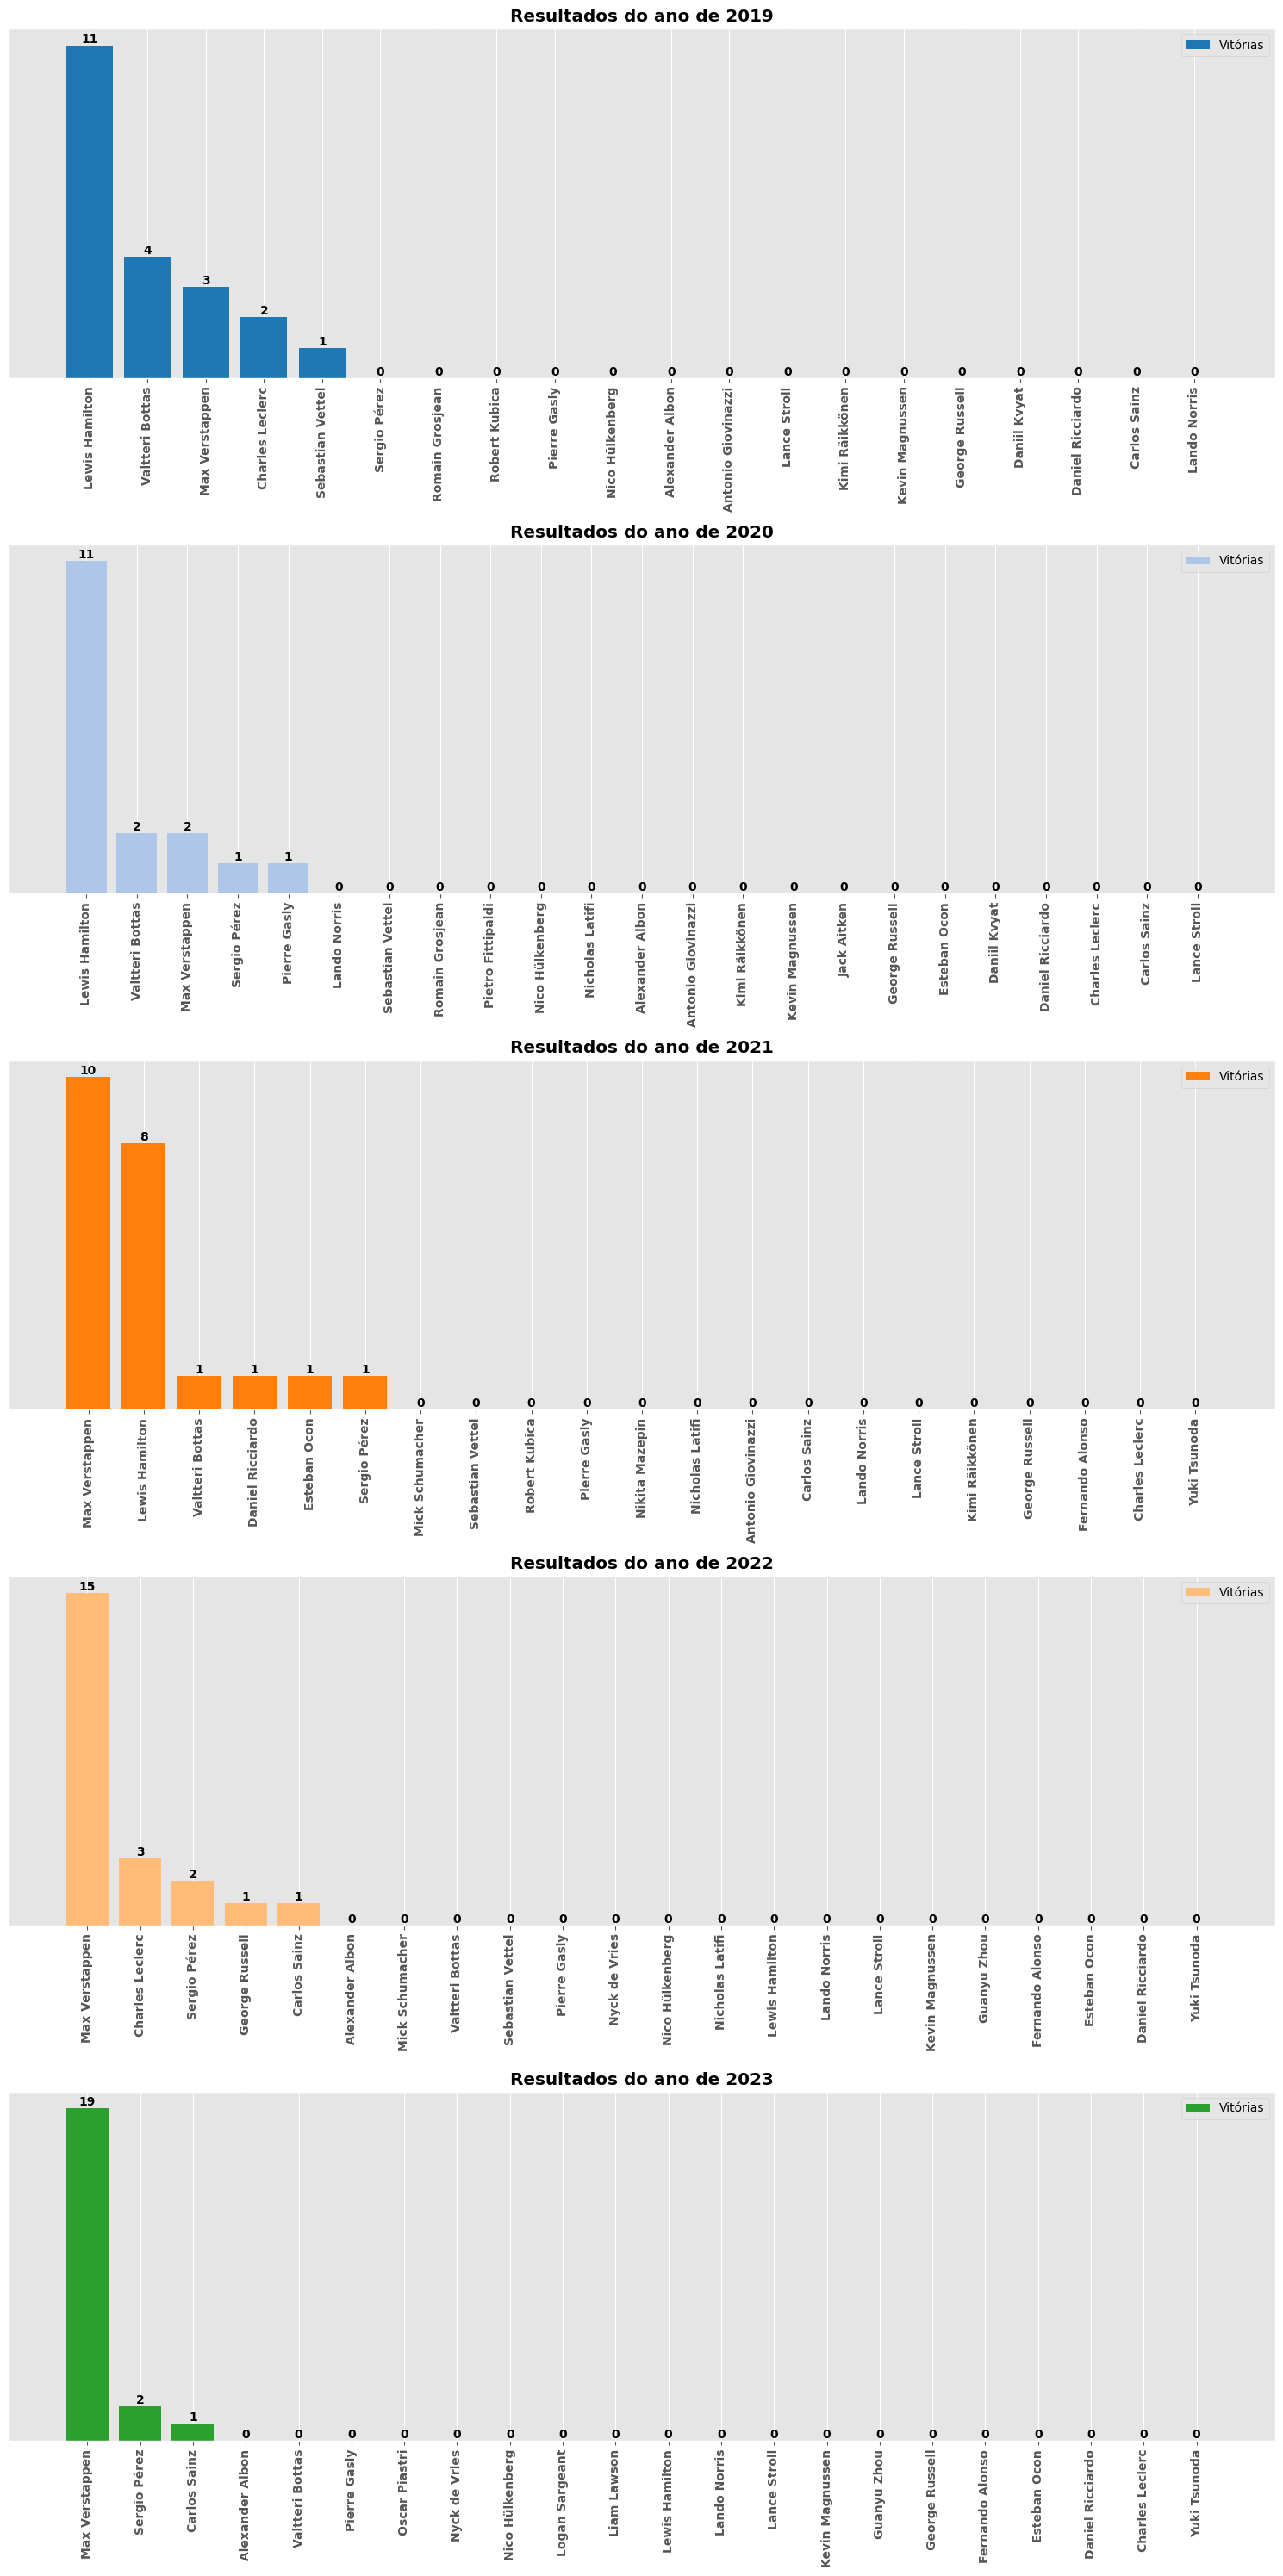

In [22]:
#Análise de performance dos pilotos nos últimos 5 anos. 
anos = [2019, 2020, 2021, 2022, 2023] #OBS.: Como não temos dados completos de 2024, considerei a partir de 2023
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 30)) 

for i, ano in enumerate(anos):
    
    df_plot = stats_corridas[['driver_name', 'points', 'wins']].loc[stats_corridas['year'] == ano].groupby('driver_name').sum().sort_values(by='wins', ascending=False)

    g_barra = axs[i].bar(df_plot.index, df_plot['wins'], color=cores[i], label='Vitórias')

    axs[i].bar_label(g_barra, labels=df_plot['wins'], fontweight='bold')
    axs[i].set_yticks([]) 
    axs[i].set_xticklabels(df_plot.index, rotation=90, fontweight='bold') 
    axs[i].legend()
    axs[i].set_title(f'Resultados do ano de {ano}', fontweight='bold')

plt.tight_layout() 
plt.show()

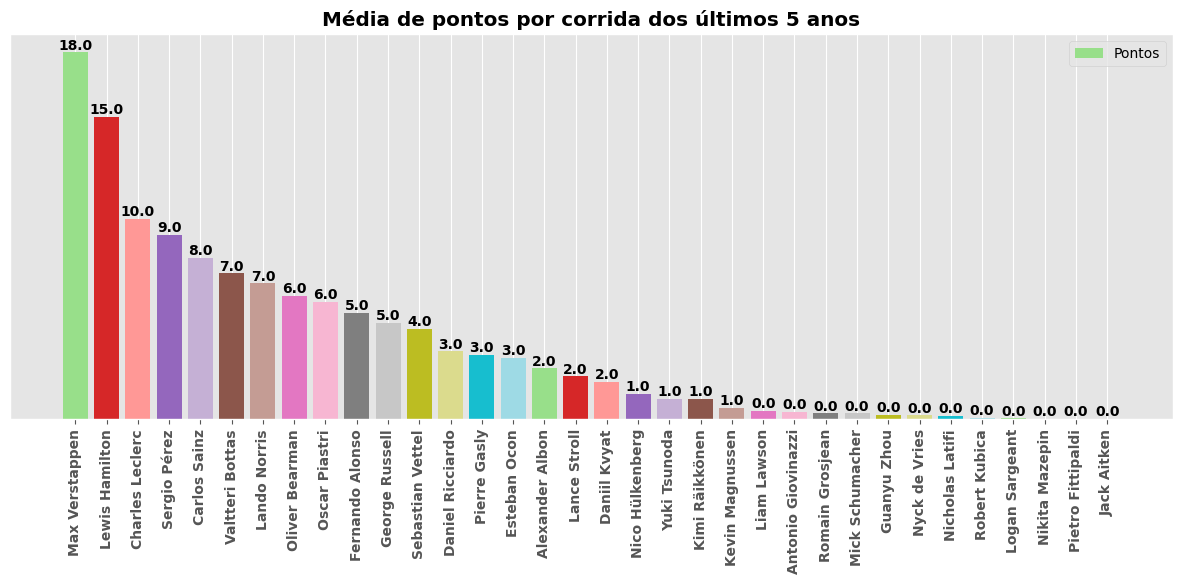

In [23]:
#Análise de performance dos pilotos nos últimos 5 anos. 
#OBS.: Como não temos dados completos de 2024, considerei a partir de 2023 
plt.figure(figsize=(15, 5)) 
   
df_plot = stats_corridas[['driver_name', 'points', 'wins']].loc[stats_corridas['year'] >= 2019].groupby('driver_name').mean().sort_values(by='points', ascending=False)

g_barra = plt.bar(df_plot.index, df_plot['points'], color=cores[5:], label='Pontos')

plt.bar_label(g_barra, labels=round(df_plot['points']), fontweight='bold')
plt.yticks([]) 
plt.xticks(df_plot.index, rotation=90, fontweight='bold') 
plt.legend()
plt.title('Média de pontos por corrida dos últimos 5 anos', fontweight='bold')

plt.show()

Como podemos ver, Lewis Hamilton e Max Verstappen são os pilotos com maiores vitórias e performances de corrida, conquistando pontos importantes para suas equipes. Além disso, em 2021 foi um ano competitivo entre esses dois atletas e com certeza emocionante de assistir para os amantes do esporte. 

- Agora vamos avaliar a performance dos construtores nesse mesmo período.

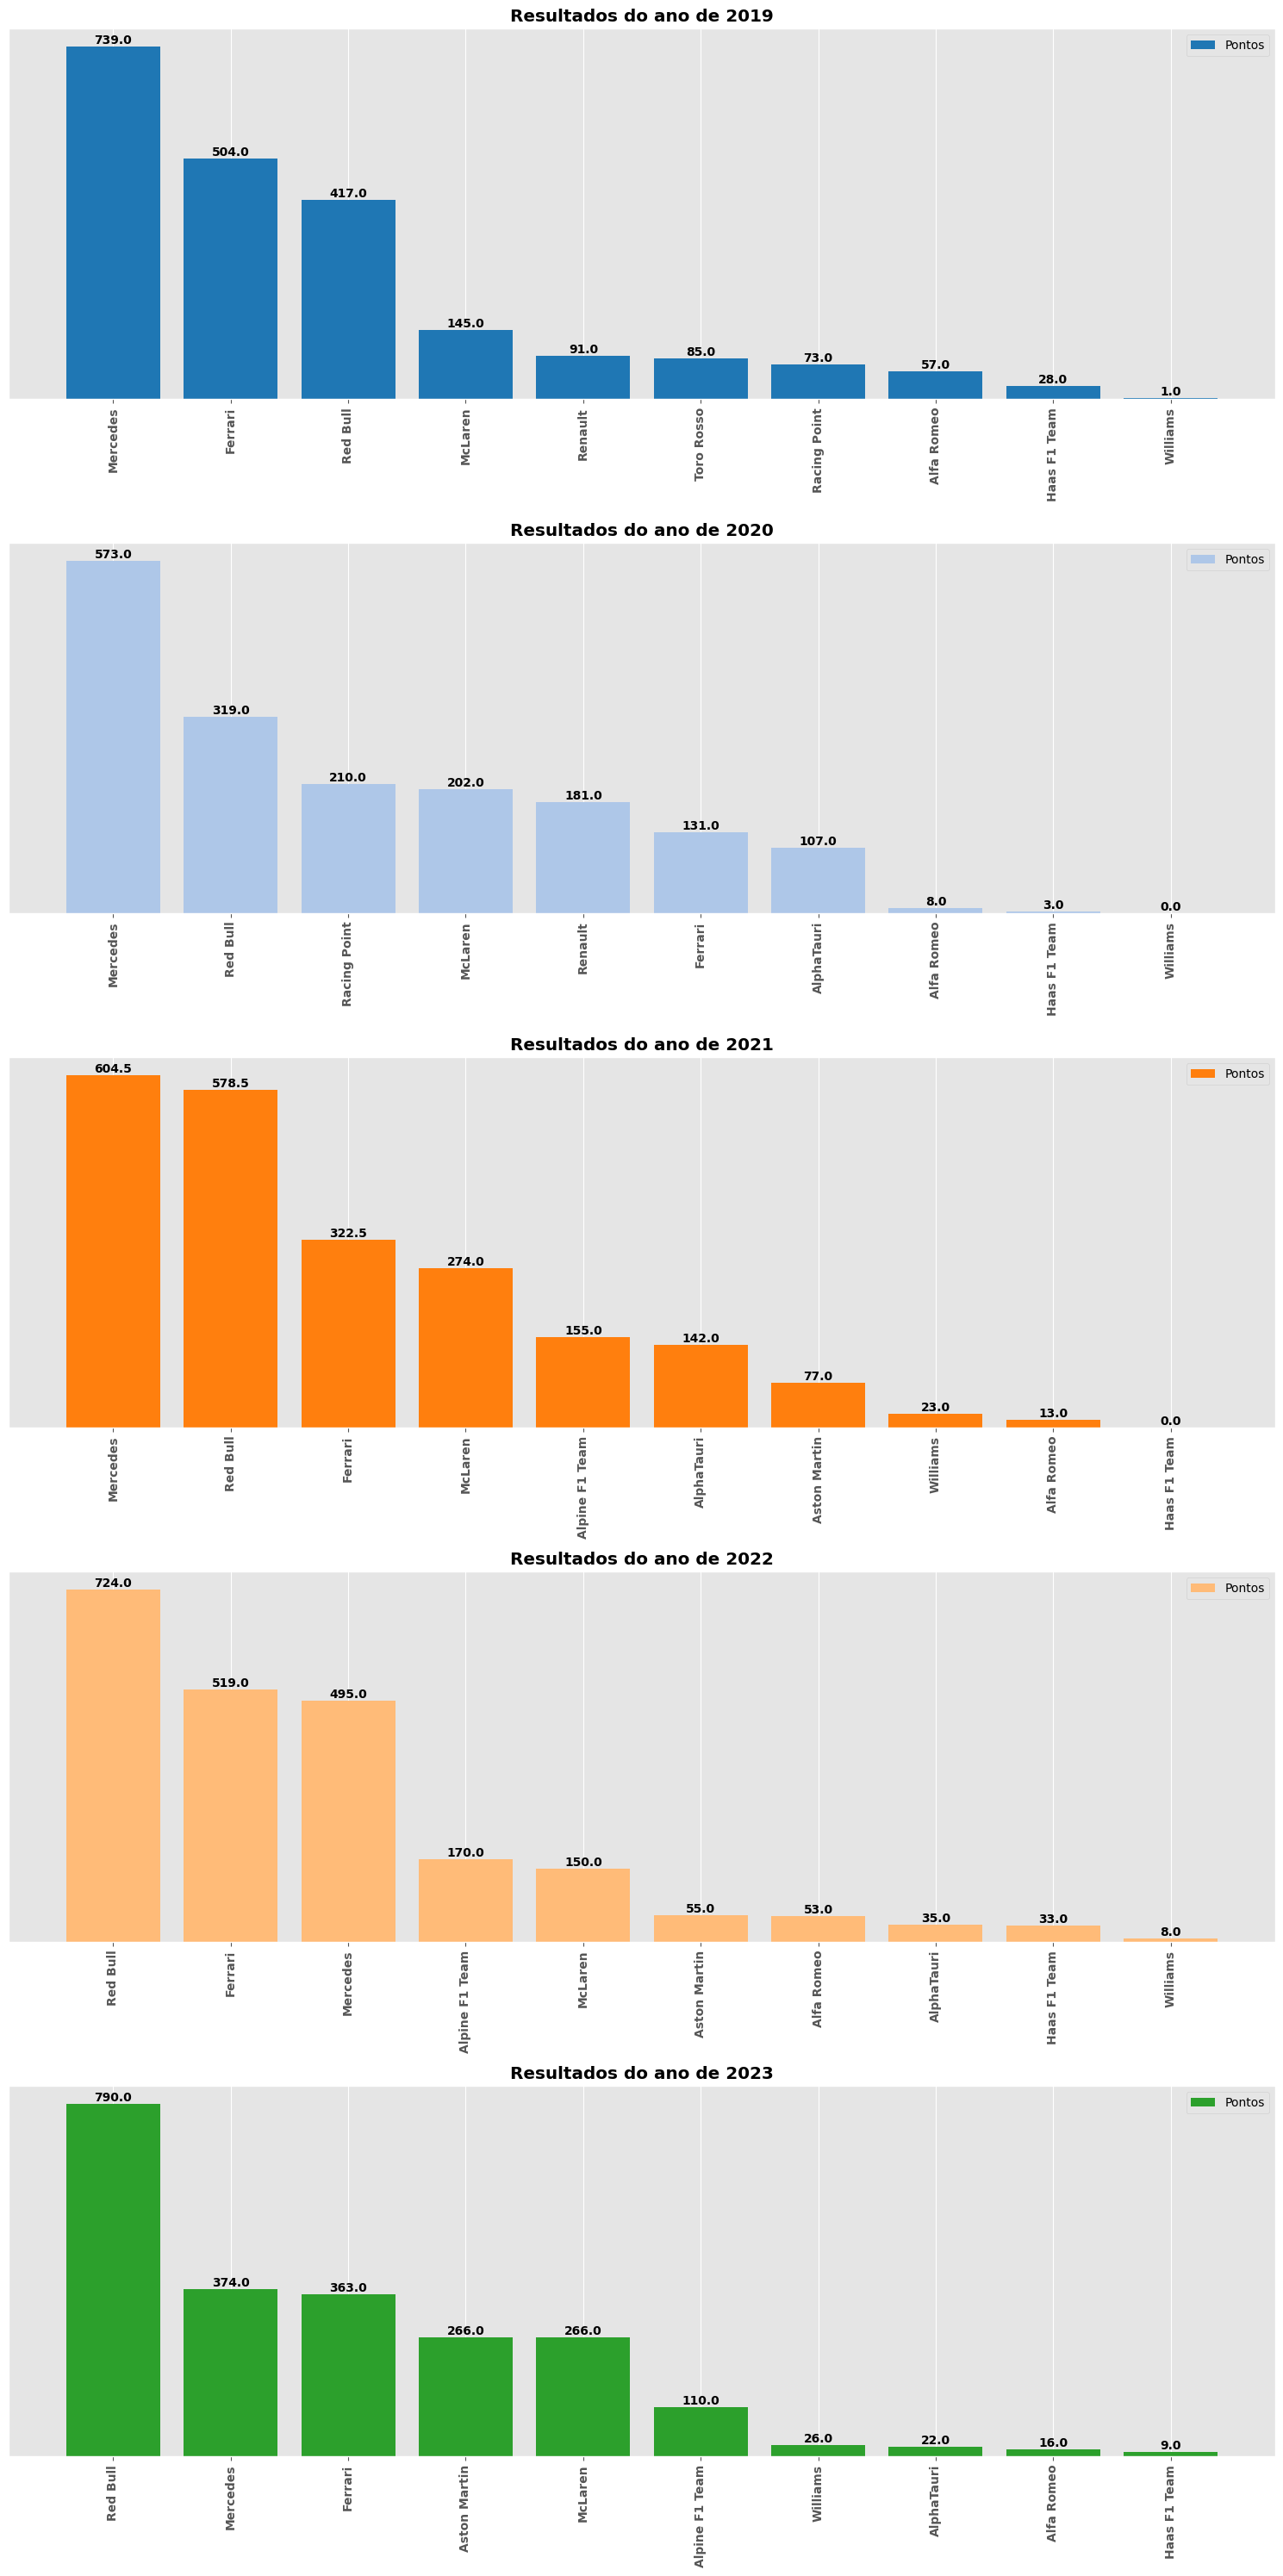

In [24]:
#Análise de performance dos pilotos nos últimos 5 anos. 
anos = [2019, 2020, 2021, 2022, 2023] #OBS.: Como não temos dados completos de 2024, considerei a partir de 2023 
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 30)) 

for i, ano in enumerate(anos):
    
    df_plot = stats_corridas[['team_name', 'points', 'wins']].loc[stats_corridas['year'] == ano].groupby('team_name').sum().sort_values(by='points', ascending=False)

    g_barra = axs[i].bar(df_plot.index, df_plot['points'], color=cores[i], label='Pontos')

    axs[i].bar_label(g_barra, labels=df_plot['points'], fontweight='bold')
    axs[i].set_yticks([]) 
    axs[i].set_xticklabels(df_plot.index, rotation=90, fontweight='bold') 
    axs[i].legend()
    axs[i].set_title(f'Resultados do ano de {ano}', fontweight='bold')

plt.tight_layout() 
plt.show()

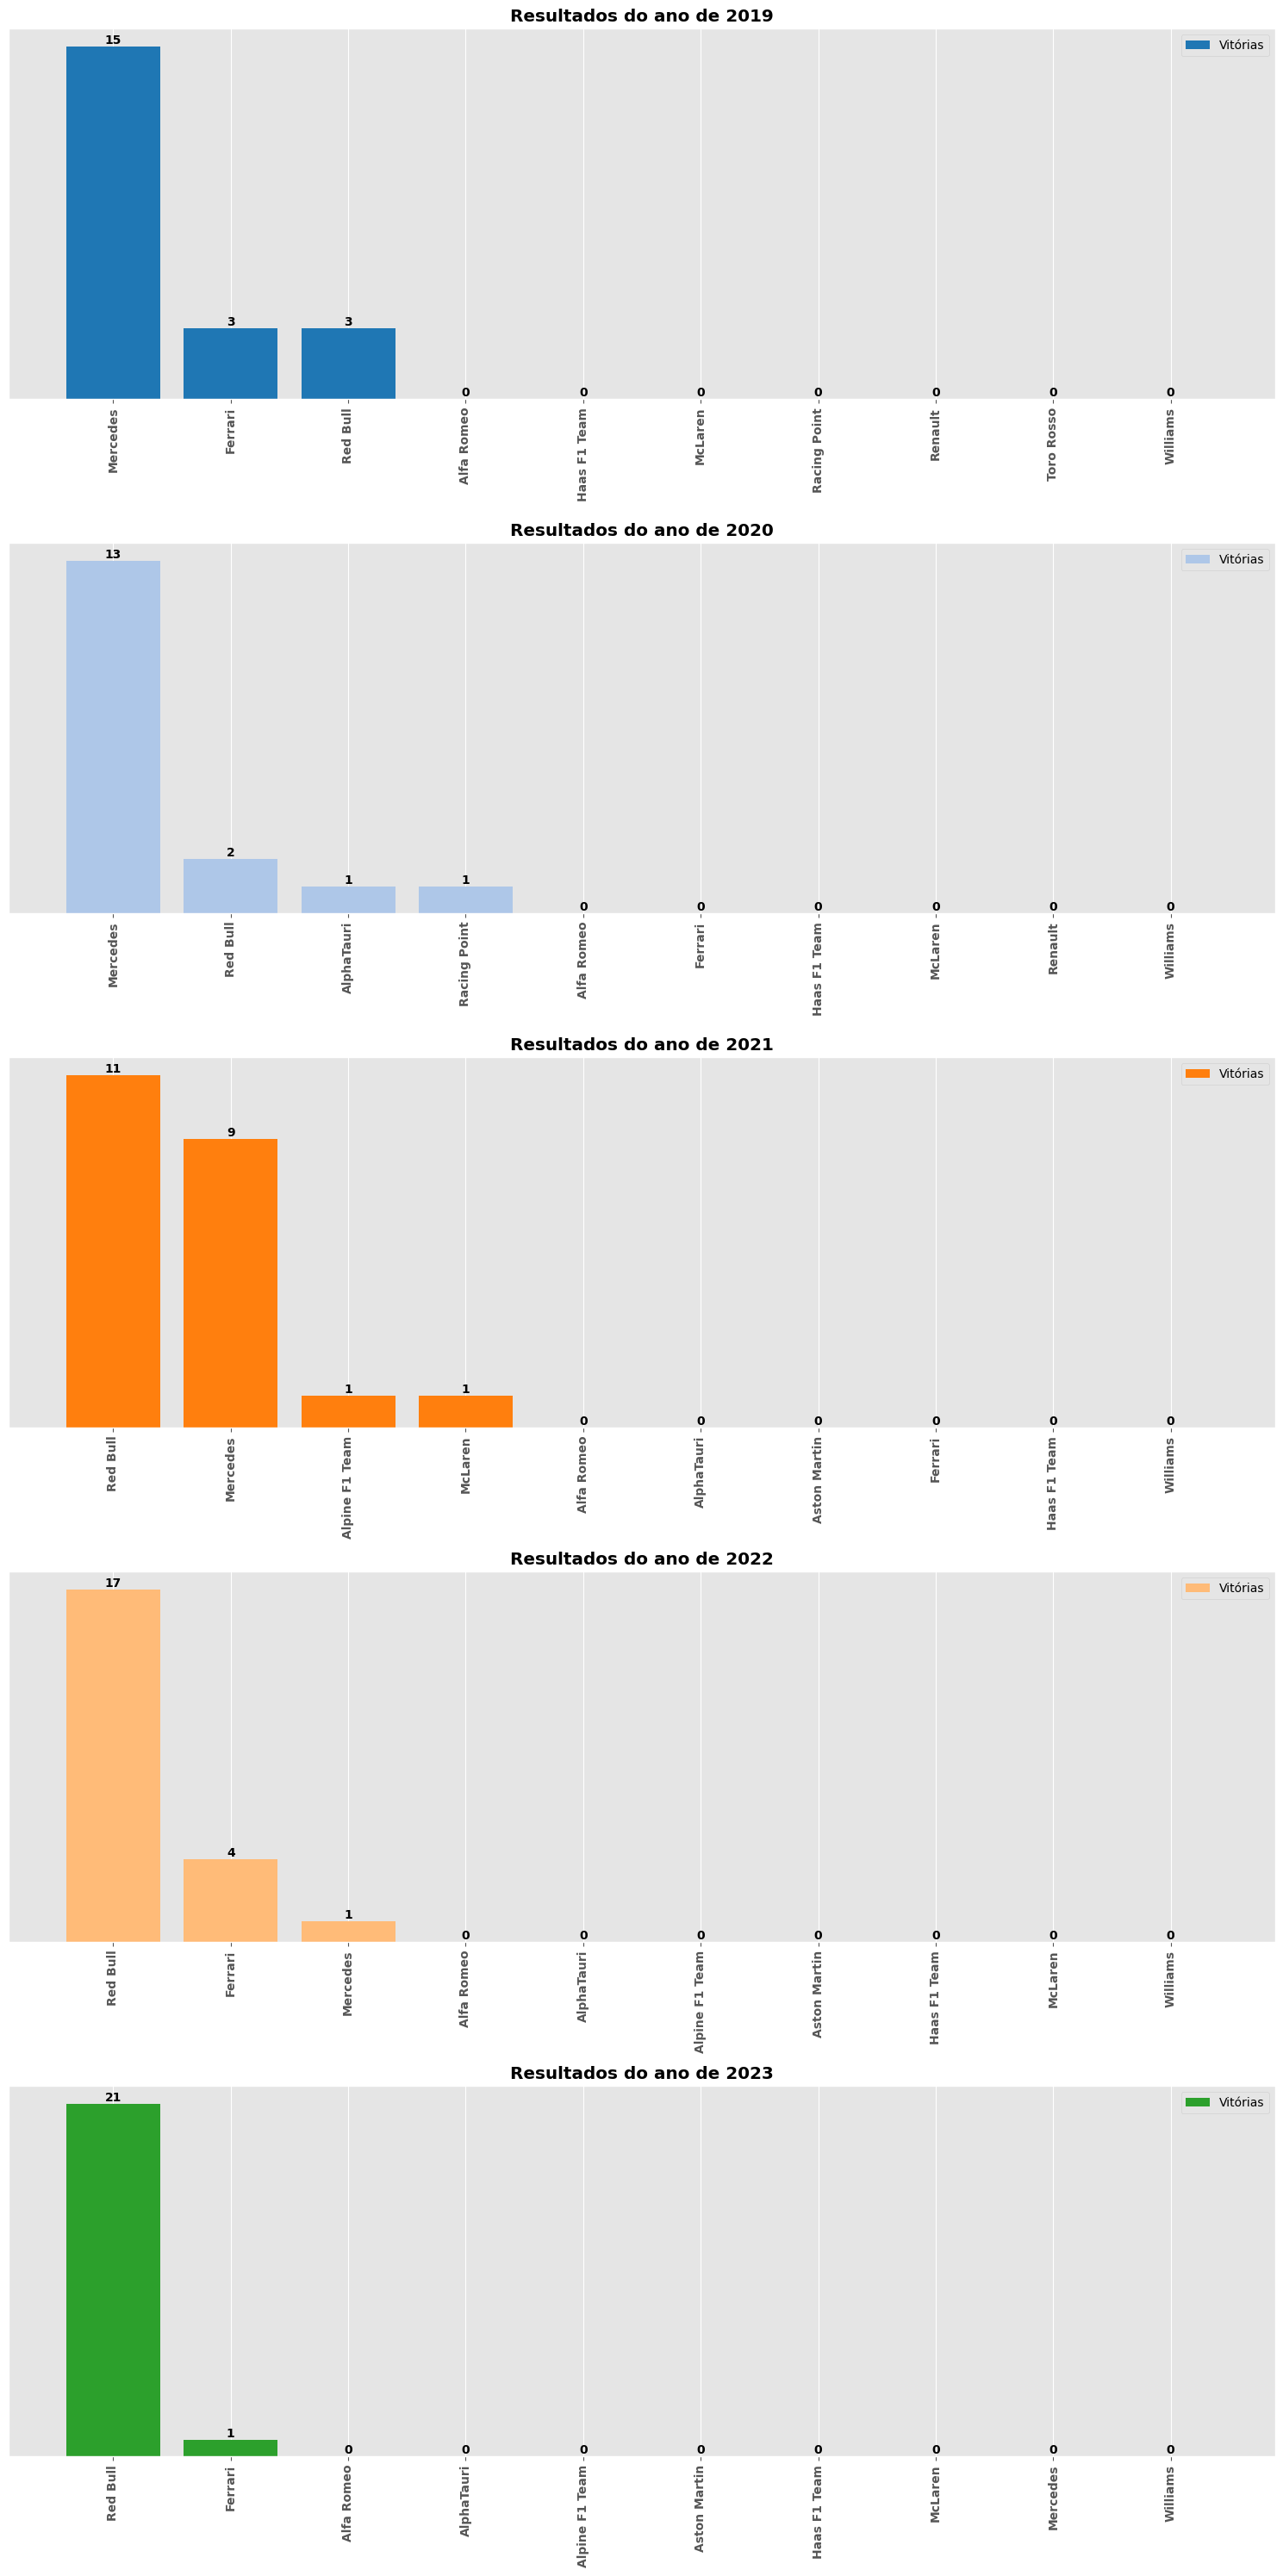

In [25]:
#Análise de performance dos pilotos nos últimos 5 anos. 
anos = [2019, 2020, 2021, 2022, 2023] #OBS.: Como não temos dados completos de 2024, considerei a partir de 2023 
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 30)) 

for i, ano in enumerate(anos):
    
    df_plot = stats_corridas[['team_name', 'points', 'wins']].loc[stats_corridas['year'] == ano].groupby('team_name').sum().sort_values(by='wins', ascending=False)
    
    g_barra = axs[i].bar(df_plot.index, df_plot['wins'], color=cores[i], label='Vitórias')

    axs[i].bar_label(g_barra, labels=df_plot['wins'], fontweight='bold')
    axs[i].set_yticks([]) 
    axs[i].set_xticklabels(df_plot.index, rotation=90, fontweight='bold') 
    axs[i].legend()
    axs[i].set_title(f'Resultados do ano de {ano}', fontweight='bold')

plt.tight_layout() 
plt.show()

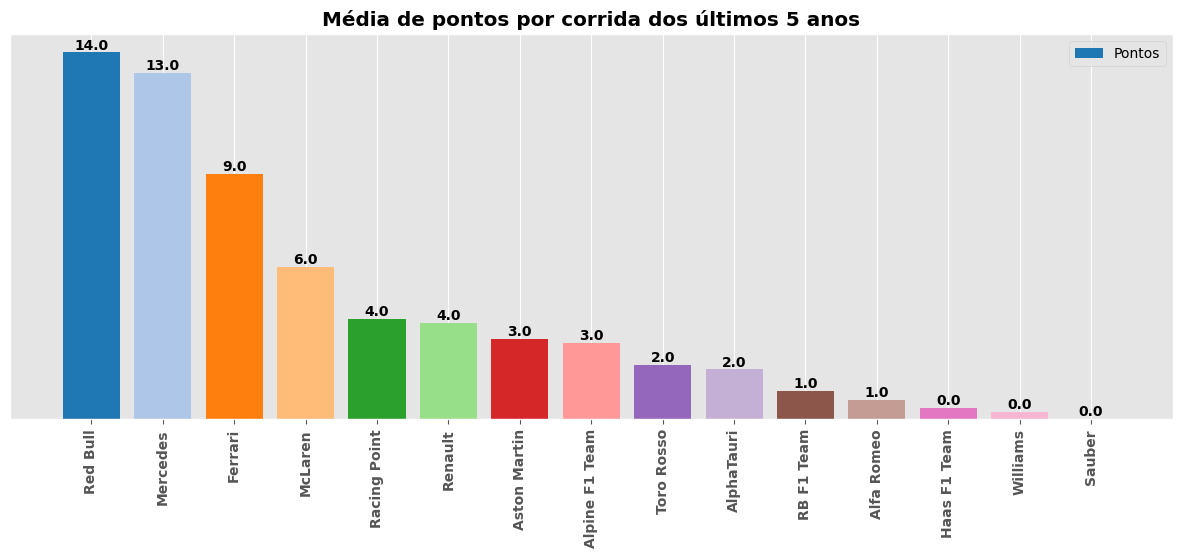

In [26]:
#Análise de performance dos pilotos nos últimos 5 anos. 
#OBS.: Como não temos dados completos de 2024, considerei a partir de 2023 
plt.figure(figsize=(15, 5)) 
   
df_plot = stats_corridas[['team_name', 'points', 'wins']].loc[stats_corridas['year'] >= 2019].groupby('team_name').mean().sort_values(by='points', ascending=False)

g_barra = plt.bar(df_plot.index, df_plot['points'], color=cores[:], label='Pontos')

plt.bar_label(g_barra, labels=round(df_plot['points']), fontweight='bold')
plt.yticks([]) 
plt.xticks(df_plot.index, rotation=90, fontweight='bold') 
plt.legend()
plt.title('Média de pontos por corrida dos últimos 5 anos', fontweight='bold')

plt.show()

Observamos que as performances se espelham no campeonato de construtores entre Mercedes e Red Bull, as quais contam com Lewis Hamilton e Max Verstappen no quadro de atletas da equipe, respectivamente. Sendo assim, essa junção entre pilotos de elite e ótimos construtores, causam a vitória nos campeonatos da competição. 

- Por fim, vamos verificar o maior vencedor de fórmula 1 de toda a história do esporte e também a equipe com maior quantidade de pontos conquistados.

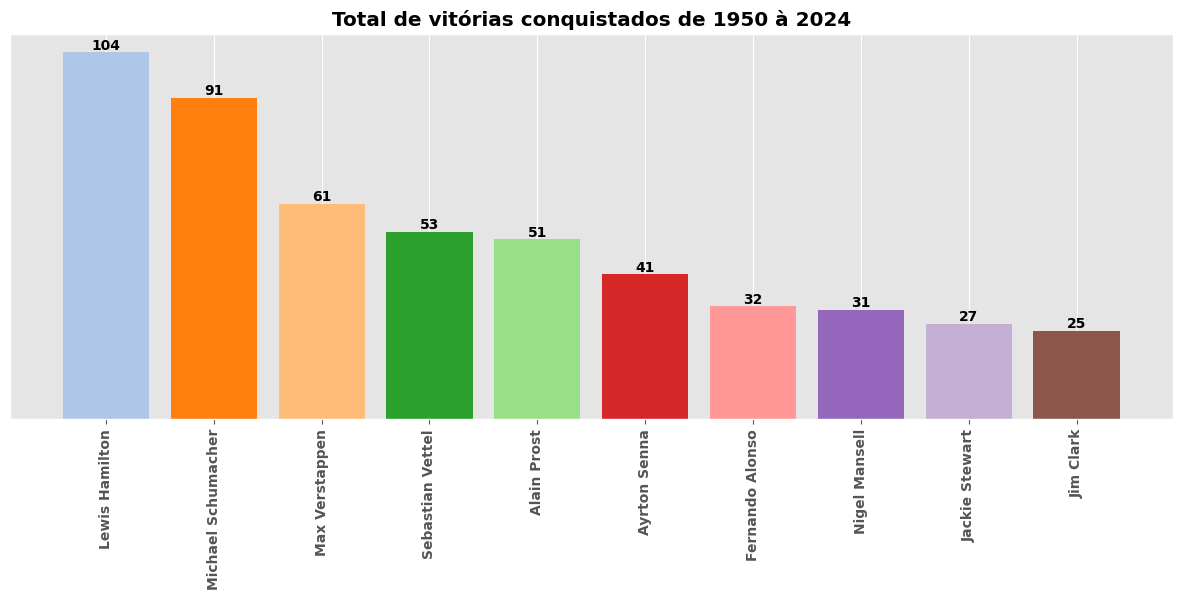

In [27]:
plt.figure(figsize=(15, 5)) 
   
df_plot = stats_corridas[['driver_name', 'points', 'wins']].groupby('driver_name').sum().sort_values(by='wins', ascending=False)

g_barra = plt.bar(df_plot.index[0:10], df_plot['wins'].head(10), color=cores[1:], label='Vitórias')

plt.bar_label(g_barra, labels=round(df_plot['wins'].head(10)), fontweight='bold')
plt.yticks([]) 
plt.xticks(df_plot.index[0:10], rotation=90, fontweight='bold') 
plt.title('Total de vitórias conquistados de 1950 à 2024', fontweight='bold')

plt.show()

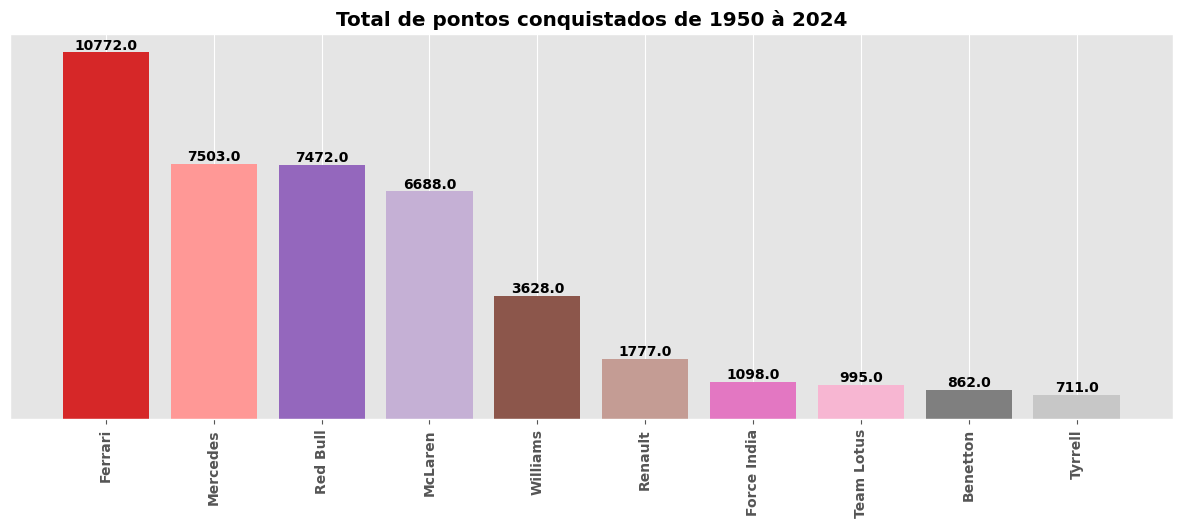

In [28]:
plt.figure(figsize=(15, 5)) 
   
df_plot = stats_corridas[['team_name', 'points', 'wins']].groupby('team_name').sum().sort_values(by='points', ascending=False)

g_barra = plt.bar(df_plot.index[0:10], df_plot['points'].head(10), color=cores[6:], label='Pontos')

plt.bar_label(g_barra, labels=round(df_plot['points'].head(10)), fontweight='bold')
plt.yticks([]) 
plt.xticks(df_plot.index[0:10], rotation=90, fontweight='bold') 
plt.title('Total de pontos conquistados de 1950 à 2024', fontweight='bold')

plt.show()

## Considerações finais

Irei exportar em csv a base de dados tratada para utilização em um dashboard de performance individual para pilotos e equipes de fórmula 1. Tornando a experiência de análises bem mais robusta e visual para o usuário. Confira a continuação do projeto em: https://samuelribeiro.streamlit.app/formula_1

In [29]:
stats_corridas

,year,driver_name,circuit_name,team_name,status,lat,lng,alt,grid,positionOrder,points,laps,time,rank,fastestLapTime,fastestLapSpeed,diffPos,wins
0,1950,Alberto Ascari,Belgian Grand Prix,Ferrari,+1 Lap,50.4372,5.97139,401,7.0,5.0,2.0,34,\N,\N,\N,\N,2.0,0
1,1950,Alberto Ascari,Italian Grand Prix,Ferrari,Engine,45.6156,9.28111,162,2.0,17.0,0.0,21,\N,\N,\N,\N,-15.0,0
2,1950,Alberto Ascari,Italian Grand Prix,Ferrari,Finished,45.6156,9.28111,162,6.0,2.0,3.0,80,\N,\N,\N,\N,4.0,0
3,1950,Alberto Ascari,Monaco Grand Prix,Ferrari,+1 Lap,43.7347,7.42056,7,7.0,2.0,6.0,99,\N,\N,\N,\N,5.0,0
4,1950,Alberto Ascari,Swiss Grand Prix,Ferrari,Oil pump,46.9589,7.40194,551,5.0,17.0,0.0,4,\N,\N,\N,\N,-12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26511,2024,Yuki Tsunoda,Japanese Grand Prix,RB F1 Team,+1 Lap,34.8431,136.54100,45,10.0,10.0,1.0,52,\N,14,1:36.342,216.989,0.0,0
26512,2024,Yuki Tsunoda,Miami Grand Prix,RB F1 Team,Finished,25.9581,-80.23890,0,10.0,7.0,6.0,57,+26.185,10,1:31.682,212.508,3.0,0
26513,2024,Yuki Tsunoda,Monaco Grand Prix,RB F1 Team,+1 Lap,43.7347,7.42056,7,8.0,8.0,4.0,77,\N,0,\N,\N,0.0,0
26514,2024,Yuki Tsunoda,Saudi Arabian Grand Prix,RB F1 Team,+1 Lap,21.6319,39.10440,15,9.0,15.0,0.0,49,\N,15,1:33.026,238.926,-6.0,0
